## Overpriced items prediction

Using some machine learning algorithms to predict if an item is overpriced or not.

OBSERVAÇÃO: Este notebook, apesar de funcional, ainda está em uma versão inicial. Ainda precisa ser refatorado e melhorado.

In [2]:
import pandas as pd
import numpy as np

Data = pd.read_csv('Salic_Data.csv')
Data.columns = ['IdPRONAC', 'CgcCpf', 'AnoProjeto', 'Sequencial', 'idPlanilhaEtapa', 'UF', 'Municipio', 'Item', 'Unidade', 'Quantidade(Proposta)', 'Ocorrencia(Proposta)', 'QtdeDias(Proposta)', 'ValorUnitario(Proposta)', 'Justificativa(Proposta)', 'Quantidade(Projeto)', 'Ocorrencia(Projeto)', 'QtdeDias(Projeto)', 'ValorUnitario(Projeto)', 'Justificativa(Parecista)', 'Produto']

X = Data[['IdPRONAC', 'CgcCpf', 'AnoProjeto', 'Sequencial', 'idPlanilhaEtapa', 'UF', 'Municipio', 'Item', 'Unidade', 'Quantidade(Proposta)', 'Ocorrencia(Proposta)', 'QtdeDias(Proposta)', 'ValorUnitario(Proposta)', 'Justificativa(Proposta)', 'Quantidade(Projeto)', 'Ocorrencia(Projeto)', 'QtdeDias(Projeto)', 'ValorUnitario(Projeto)', 'Justificativa(Parecista)', 'Produto']]


## Data Processing

Creating useful features/outputs.

Foram criadas as seguintes colunas para seram usadas como "label":

    - Aprovado?
    Significa que não houve alteração no preço do item ao passar de proposta para projeto.
    
    - Reprovado?(PrecoAumentou)
    Significa que o preço do item está abaixo da média, e aumentou ao virar projeto.
    
    - Reprovado?(PrecoDiminuiu)
    Significa que o preço do item está acima da média, e diminuiu ao virar projeto.
    
    - Removido?
    O item foi removido da proposta.

In [6]:
X['Aprovado?'] = X['ValorUnitario(Proposta)'] == X['ValorUnitario(Projeto)']
X['Reprovado?(PrecoAumentou)'] = np.array(X['ValorUnitario(Proposta)']) < np.array(X['ValorUnitario(Projeto)'])
X['Reprovado?(PrecoDiminuiu)'] = np.array(X['ValorUnitario(Proposta)']) > np.array(X['ValorUnitario(Projeto)'])
X['Removido?'] = (np.array(X['ValorUnitario(Projeto)']) == 0) * (np.array(X['ValorUnitario(Proposta)']) != 0)


ConjuntoDeItens = set(X['Item'])

# FEATURE INDICES
itemIndex = {featureName: index for index, featureName in enumerate(X)}


from collections import defaultdict
itensDict = defaultdict(list)

X_values = X.values
for item  in X_values:
    itensDict[item[itemIndex['Item']]].append(item) 

## Plot Data

Plotar gráficos do preço dos itens pelo ano (os itens são espalhados de forma randômica pelo ano para melhor visualização).

    - Aprovado: Azul
    - Preço diminuiu: Vermelho
    - Preço aumentou: Verde
    - Removido: Laranja


Caixa de passagem 30x30x40 com tampa e dreno de brita


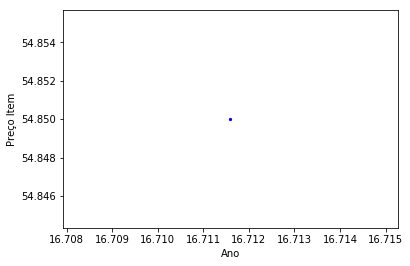

Arte educador


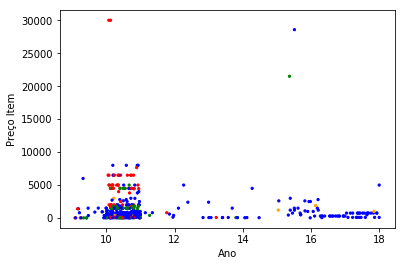

Andaimes: Montagem e Desmontagem


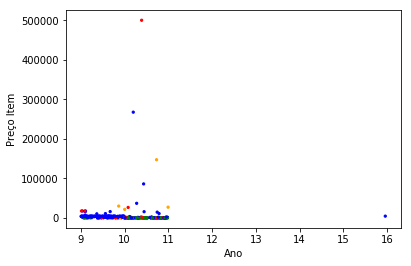

Placas de Estante


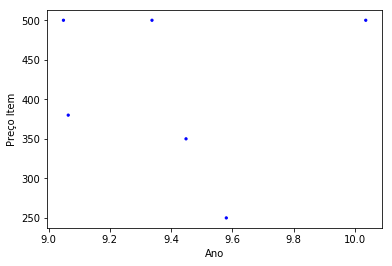

Contra-piso


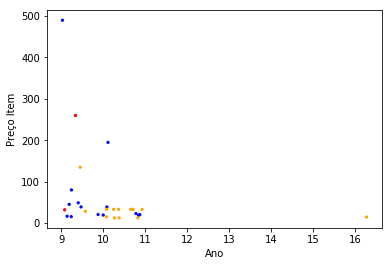

Manutenção de sistema informatizado de controle de temperatura e umidade


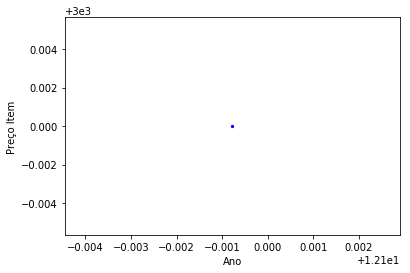

Mini impressora e Pin Ped


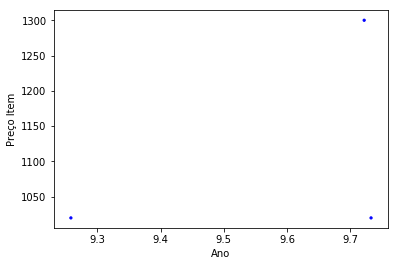

Engenheiro coordenador


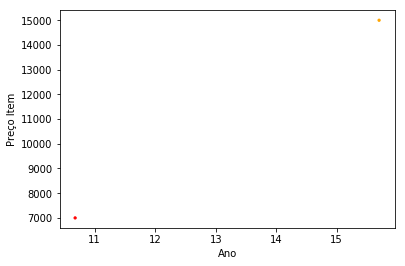

Bolsa Incentivo


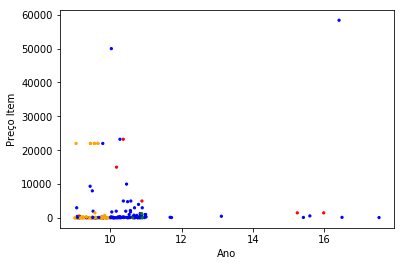

Cumeeira para telha cerâmica


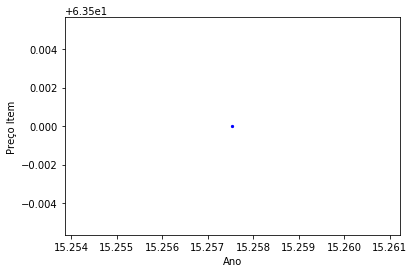

Internegativo


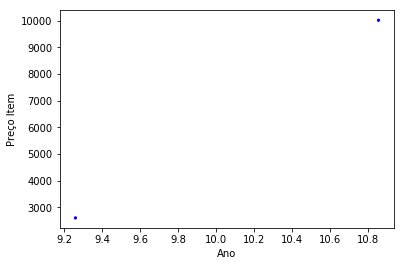

Master de vídeo


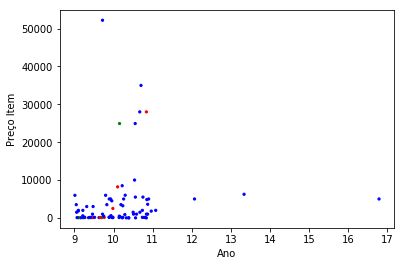

Elaboração e Agenciamento


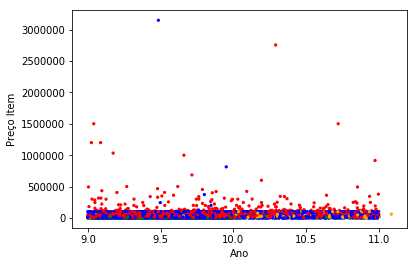

Chori Caixa de Ressonância - Instrumento musical friccionado e percutido, produzido em madeira, cabaça e metal.


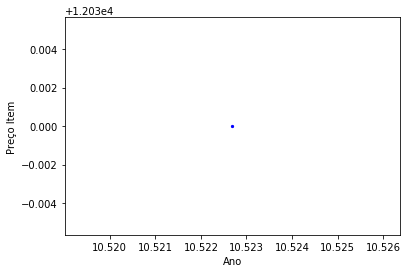

Carnavalesco


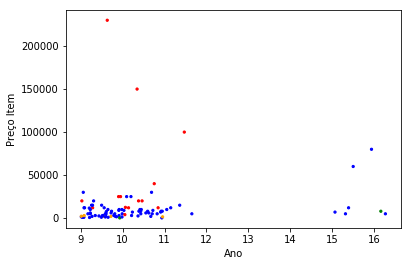

Designer


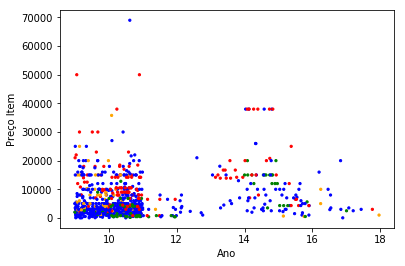

Alvenaria de pedras secas


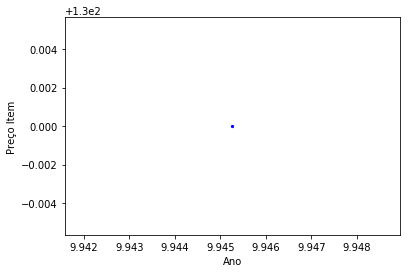

Regularização e=3cm


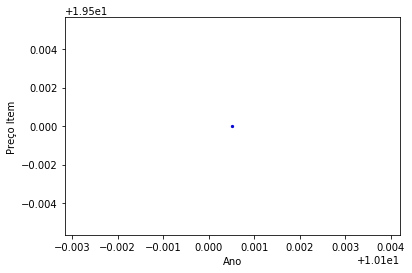

Elementos para recreação


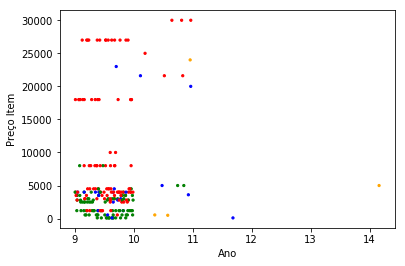

Loucas e metais


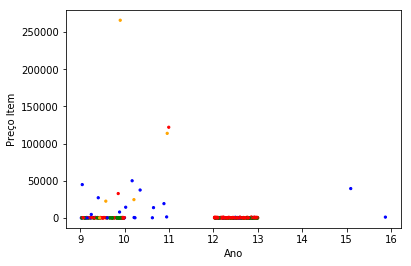

Telefone


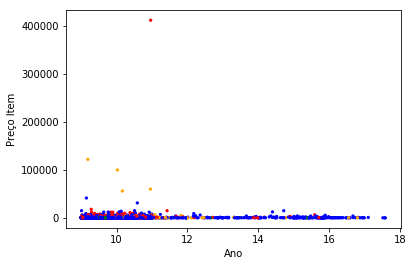

Locação de teatro


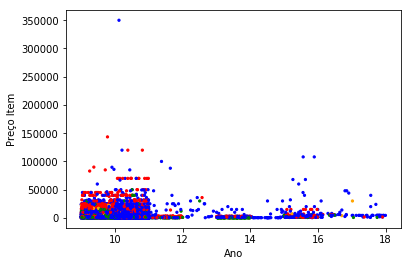

Corda de Nylon


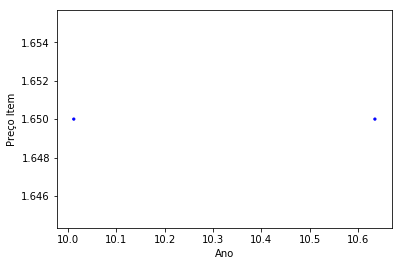

Álcool Etílico


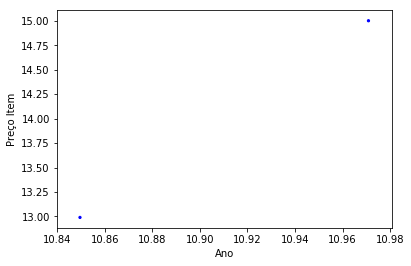

Cortinas Acústicas


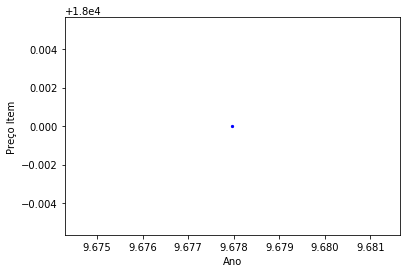

Aramagem das telhas


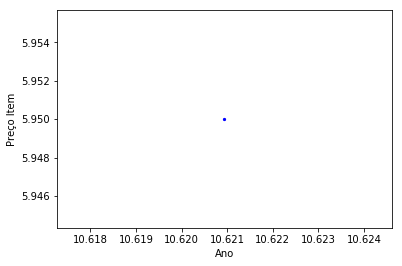

Te 63mm


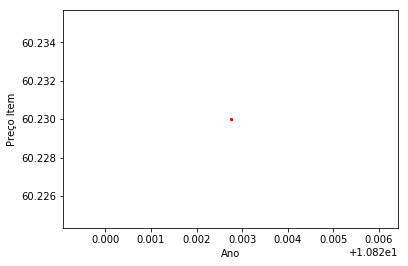

Microfilmagem


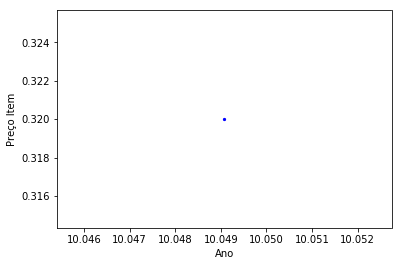

Arquiteto/engenheiro


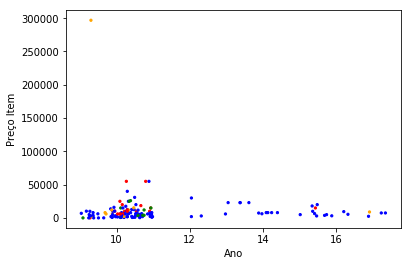

Álcool Isopropílico


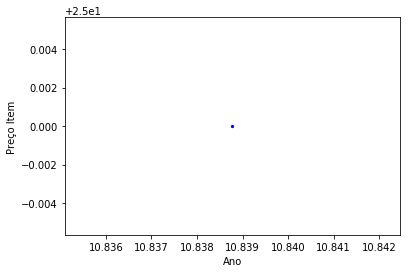

Fio encerado (barbante encerado)


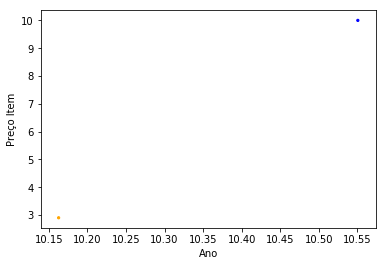

Plantio de jardins


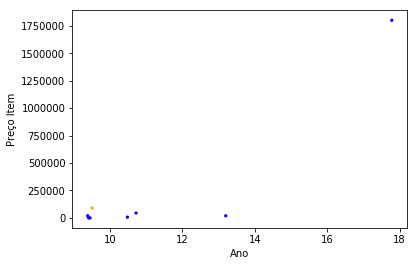

Porta de madeira com quatro folhas com vidros - 3x2,20m


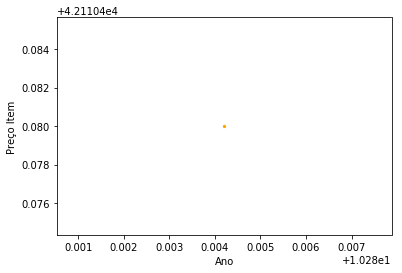

Reparos e manutenção


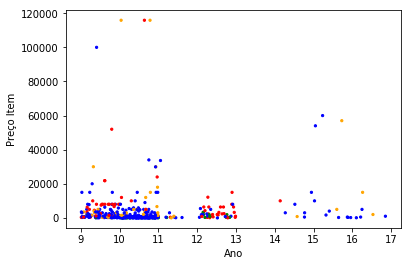

Técnico de audiovisual


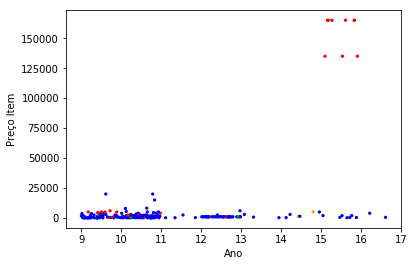

Agulha de oftalmologia curva


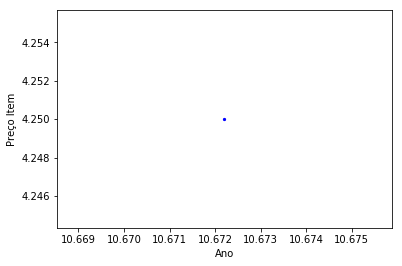

Pêndulo Acústico Grande - Instrumento musical rítmico, produzido em arame, madeira e plug eletrônico.


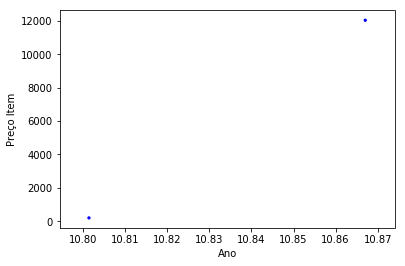

Bibliografia, cópia de iconografia e de material documental


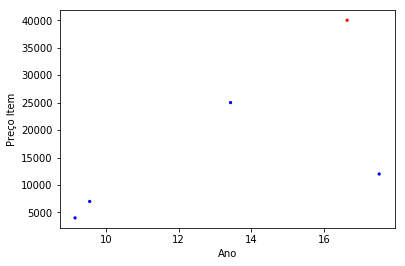

Concreto estrutural utilizando fck 25 mpa 


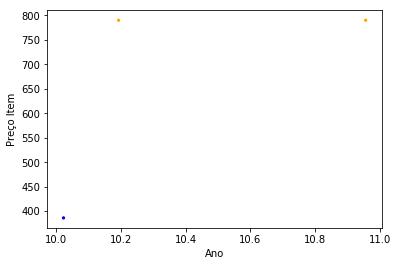

Massa corrida


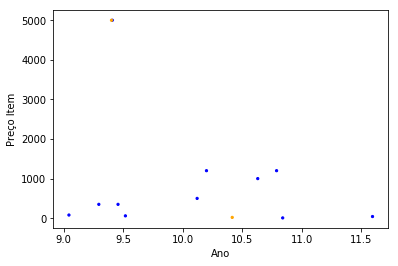

Cuba de apoio quadrada


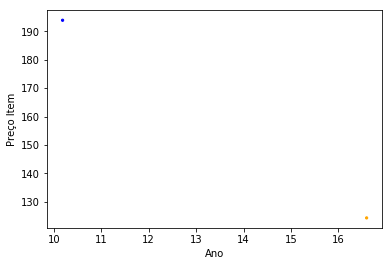

Pincel Mouse de 40mm de madeira


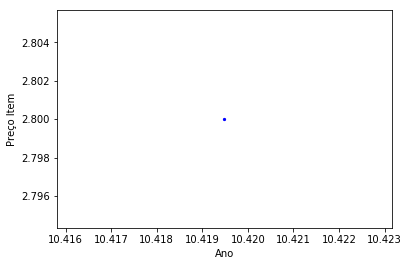

Camarim (para montagem de estrutura no caso de locais abertos)


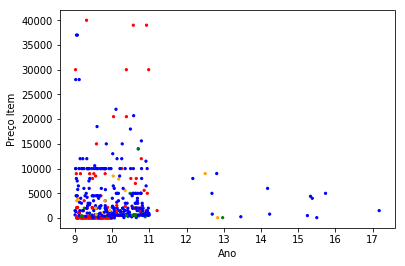

Serra Mármore


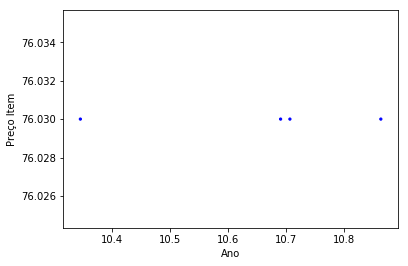

Frigideira de aço


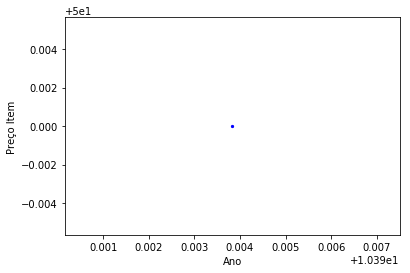

Pintor


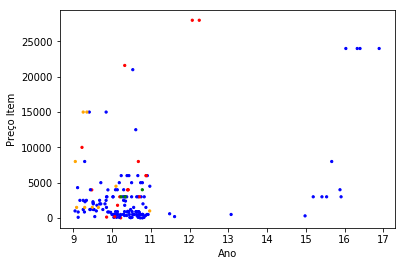

Estofador


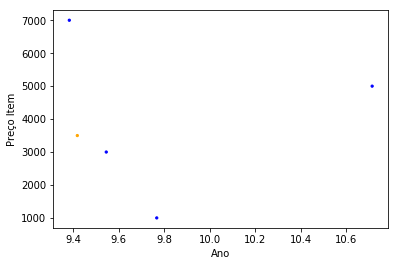

Edição de imagem


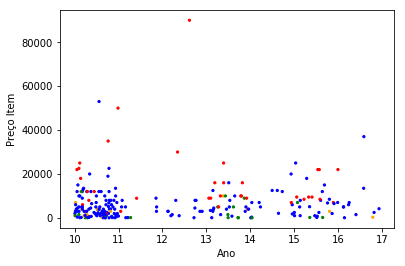

Distribuidor de impresso


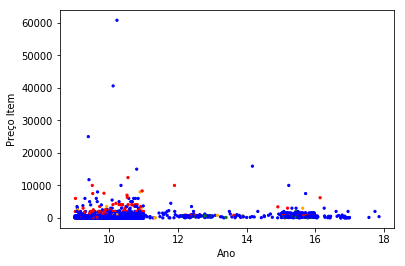

Luvas de Látex-Tamanho M


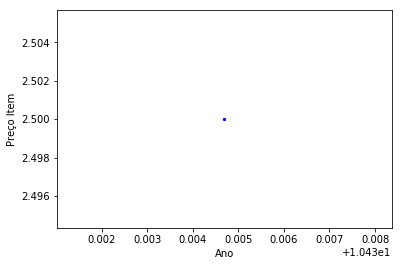

Tecido de algodão cru


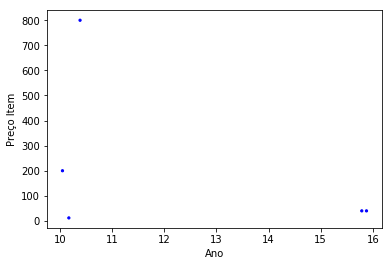

In [10]:
def point_color(aprovado, diminuiu, aumentou, removido):
    if(aprovado):
        return 'Blue'
    if(diminuiu and not removido):
        return 'Red'
    if(aumentou and not removido):
        return 'Green'
    if(removido):
        return 'Orange'


import matplotlib.pyplot as plt

for index, itemName in enumerate(ConjuntoDeItens):
    print(itemName)
    item = itensDict[itemName]
    itemArray = np.array(item)

    color_array = [point_color(aprovado, diminuiu, aumentou, removido) for aprovado, diminuiu, aumentou, removido in itemArray[:,[itemIndex['Aprovado?'], itemIndex['Reprovado?(PrecoDiminuiu)'], itemIndex['Reprovado?(PrecoAumentou)'], itemIndex['Removido?']]]]
    #plt.scatter(x=itemArray[:,itemIndex['AnoProjeto']],y=itemArray[:,itemIndex['ValorUnitario(Proposta)']], c=color_array)

    x_position_array = itemArray[:,itemIndex['AnoProjeto']]
    #print(x_position_array)
    x_position_array = x_position_array + np.random.rand(1,len(x_position_array))
    #print(x_position_array)
    plt.scatter(x=x_position_array,y=itemArray[:,itemIndex['ValorUnitario(Proposta)']], c=color_array, s=5)
    
    plt.xlabel('Ano')
    plt.ylabel('Preço Item')
    
    
    plt.show()

    # Limitar o número de gráficos
    if (index ==50):
        break

## Print features of a specific item

Imprime as "features" de um item específico.

In [8]:
item_name = 'Porta acústica'
item_to_evaluate = itensDict[item_name]


for item in item_to_evaluate:
    print(item[itemIndex['Item']], '\n')
    for k, v in itemIndex.items(): 
        print(k, ': ', item[v])
    print('------------------\n')


Porta acústica 

IdPRONAC :  119441
CgcCpf :  3982591000138
AnoProjeto :  9
Sequencial :  8147
idPlanilhaEtapa :  2
UF :  SP
Municipio :  São Paulo
Item :  Porta acústica
Unidade :  Verba
Quantidade(Proposta) :  3.0
Ocorrencia(Proposta) :  1
QtdeDias(Proposta) :  730
ValorUnitario(Proposta) :  6772.99
Justificativa(Proposta) :  nan
Quantidade(Projeto) :  3.0
Ocorrencia(Projeto) :  1
QtdeDias(Projeto) :  730
ValorUnitario(Projeto) :  0.0
Justificativa(Parecista) :  A pedido do proponente. Item será objeto de segunda etapa do projeto, após implementação da 1ª etapa.
Produto :  Bem Imóvel - Reforma / Ampliação / Construção / Aquisição
Aprovado? :  False
Reprovado?(PrecoAumentou) :  False
Reprovado?(PrecoDiminuiu) :  True
Removido? :  True
------------------

Porta acústica 

IdPRONAC :  207226
CgcCpf :  12011520000189
AnoProjeto :  16
Sequencial :  4398
idPlanilhaEtapa :  2
UF :  SP
Municipio :  Rincão
Item :  Porta acústica
Unidade :  Unidade
Quantidade(Proposta) :  1.0
Ocorrencia(Propos

QtdeDias(Proposta) :  5
ValorUnitario(Proposta) :  4219.43
Justificativa(Proposta) :  PM09 - Porta de madeira 2 folhas de abrir acústica (1,70x2,10)m

Quantidade(Projeto) :  7.0
Ocorrencia(Projeto) :  1
QtdeDias(Projeto) :  7
ValorUnitario(Projeto) :  4219.43
Justificativa(Parecista) :  nan
Produto :  Bem Imóvel - Reforma / Ampliação / Construção / Aquisição
Aprovado? :  True
Reprovado?(PrecoAumentou) :  False
Reprovado?(PrecoDiminuiu) :  False
Removido? :  False
------------------

Porta acústica 

IdPRONAC :  127355
CgcCpf :  29527413000100
AnoProjeto :  10
Sequencial :  7097
idPlanilhaEtapa :  2
UF :  RJ
Municipio :  Rio de Janeiro
Item :  Porta acústica
Unidade :  Unidade
Quantidade(Proposta) :  1.0
Ocorrencia(Proposta) :  1
QtdeDias(Proposta) :  2
ValorUnitario(Proposta) :  3516.19
Justificativa(Proposta) :  PM04 - Porta de madeira 2 folhas de abrir 180º acústica (1,50x2,10)m

Quantidade(Projeto) :  7.0
Ocorrencia(Projeto) :  1
QtdeDias(Projeto) :  7
ValorUnitario(Projeto) :  4219

## Applying some ML algorithms


### Random Forest Classifier

In [18]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import itertools

for index, itemName in enumerate(ConjuntoDeItens):
    item = itensDict[itemName]
    itemArray = np.array(item)

    # ONLY EVALUATE ITEMS THAT ARE USED MORE THEN 20 TIMES.
    if (len(itemArray) > 20):
        X = itemArray[:,[itemIndex['AnoProjeto'], itemIndex['idPlanilhaEtapa'], itemIndex['Quantidade(Proposta)'], itemIndex['Ocorrencia(Proposta)'] , itemIndex['QtdeDias(Proposta)'], itemIndex['ValorUnitario(Proposta)']]]
        Y = itemArray[:,[itemIndex['Reprovado?(PrecoDiminuiu)']]].transpose()[0].astype(int)  


        kf = KFold(n_splits=4)
        kf.get_n_splits(X)

        total_confusion_matrix = [[0, 0], [0, 0]]
        for train_index, test_index in kf.split(X):
            #print("\n\n","TRAIN_X:", X[train_index], "\n", "TEST_X:", X[test_index], "\n")
            #print("TRAIN_Y:", Y[train_index], "\n", "TEST_Y:", Y[test_index], "\n\n")
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = Y[train_index], Y[test_index]

            
            classifier = RandomForestClassifier(n_estimators=10, class_weight='balanced')   # class_weight={0:1, 1:1}
            y_pred = classifier.fit(X_train, y_train).predict(X_test)

            
            # Compute confusion matrix
            cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
            total_confusion_matrix = total_confusion_matrix + cnf_matrix
            
            #print(cnf_matrix, flush=True)
        print(total_confusion_matrix, flush=True)
        print('Accuracy: ', total_confusion_matrix[0][0] / sum(sum(total_confusion_matrix)))
    
    # ONLY RUN IN SOME ITEMS.
    if(index >= 100):
        break

[[679  24]
 [ 54  22]]
Accuracy:  0.87163029525
[[222  28]
 [ 42  20]]
Accuracy:  0.711538461538
[[ 7  7]
 [ 5 10]]
Accuracy:  0.241379310345
[[90 13]
 [17 52]]
Accuracy:  0.523255813953
[[75  4]
 [ 4  2]]
Accuracy:  0.882352941176
[[3065  942]
 [1179 1749]]
Accuracy:  0.441961067051
[[71  8]
 [14  5]]
Accuracy:  0.724489795918
[[545  78]
 [185  23]]
Accuracy:  0.655836341757
[[76 32]
 [30 78]]
Accuracy:  0.351851851852
[[170  68]
 [ 58 120]]
Accuracy:  0.408653846154
[[3362  515]
 [ 731  254]]
Accuracy:  0.691484985603
[[12005  3410]
 [ 2397  1363]]
Accuracy:  0.626075619296
[[122   5]
 [ 25   4]]
Accuracy:  0.782051282051
[[569  25]
 [126  11]]
Accuracy:  0.778385772914
[[173  17]
 [ 33   0]]
Accuracy:  0.775784753363
[[262  45]
 [ 55 101]]
Accuracy:  0.565874730022
[[130  12]
 [ 24   2]]
Accuracy:  0.77380952381
[[185   9]
 [ 45   5]]
Accuracy:  0.758196721311
[[3687  417]
 [ 305  121]]
Accuracy:  0.813907284768
[[5680  277]
 [ 910  178]]
Accuracy:  0.80624556423
[[512  24]
 [ 65   

### AdaBoostClassifier

In [20]:
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier


from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import itertools

for index, itemName in enumerate(ConjuntoDeItens):
    item = itensDict[itemName]
    itemArray = np.array(item)

    # ONLY EVALUATE ITEMS THAT ARE USED MORE THEN 20 TIMES.
    if (len(itemArray) > 20):
        X = itemArray[:,[itemIndex['AnoProjeto'], itemIndex['idPlanilhaEtapa'], itemIndex['Quantidade(Proposta)'], itemIndex['Ocorrencia(Proposta)'] , itemIndex['QtdeDias(Proposta)'], itemIndex['ValorUnitario(Proposta)']]]
        Y = itemArray[:,[itemIndex['Reprovado?(PrecoDiminuiu)']]].transpose()[0].astype(int)  


        kf = KFold(n_splits=4)
        kf.get_n_splits(X)

        total_confusion_matrix = [[0, 0], [0, 0]]
        for train_index, test_index in kf.split(X):
            #print("\n\n","TRAIN_X:", X[train_index], "\n", "TEST_X:", X[test_index], "\n")
            #print("TRAIN_Y:", Y[train_index], "\n", "TEST_Y:", Y[test_index], "\n\n")
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = Y[train_index], Y[test_index]

            
            classifier = AdaBoostClassifier(n_estimators=100)
            y_pred = classifier.fit(X_train, y_train).predict(X_test)

            
            # Compute confusion matrix
            cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
            total_confusion_matrix = total_confusion_matrix + cnf_matrix
            
            #print(cnf_matrix, flush=True)
        print(total_confusion_matrix, flush=True)
        print('Accuracy: ', total_confusion_matrix[0][0] / sum(sum(total_confusion_matrix)))
    
    # ONLY RUN IN SOME ITEMS.
    if(index >= 100):
        break

[[683  20]
 [ 57  19]]
Accuracy:  0.87676508344
[[236  14]
 [ 50  12]]
Accuracy:  0.75641025641
[[9 5]
 [6 9]]
Accuracy:  0.310344827586
[[84 19]
 [16 53]]
Accuracy:  0.488372093023
[[76  3]
 [ 5  1]]
Accuracy:  0.894117647059
[[3012  995]
 [ 833 2095]]
Accuracy:  0.434318673396
[[63 16]
 [10  9]]
Accuracy:  0.642857142857
[[563  60]
 [180  28]]
Accuracy:  0.677496991576
[[79 29]
 [29 79]]
Accuracy:  0.365740740741
[[175  63]
 [ 68 110]]
Accuracy:  0.420673076923
[[3773  104]
 [ 863  122]]
Accuracy:  0.776018099548
[[15004   411]
 [ 3617   143]]
Accuracy:  0.782477183833
[[114  13]
 [ 22   7]]
Accuracy:  0.730769230769
[[555  39]
 [119  18]]
Accuracy:  0.759233926129
[[174  16]
 [ 33   0]]
Accuracy:  0.780269058296
[[279  28]
 [ 68  88]]
Accuracy:  0.602591792657
[[132  10]
 [ 20   6]]
Accuracy:  0.785714285714
[[183  11]
 [ 42   8]]
Accuracy:  0.75
[[3893  211]
 [ 377   49]]
Accuracy:  0.859381898455
[[5733  224]
 [ 946  142]]
Accuracy:  0.813768630234
[[503  33]
 [ 61  11]]
Accuracy:

### Logistic Regression

In [22]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import itertools

for index, itemName in enumerate(ConjuntoDeItens):
    item = itensDict[itemName]
    itemArray = np.array(item)

    # ONLY EVALUATE ITEMS THAT ARE USED MORE THEN 20 TIMES.
    if (len(itemArray) > 20):
        X = itemArray[:,[itemIndex['AnoProjeto'], itemIndex['idPlanilhaEtapa'], itemIndex['Quantidade(Proposta)'], itemIndex['Ocorrencia(Proposta)'] , itemIndex['QtdeDias(Proposta)'], itemIndex['ValorUnitario(Proposta)']]]
        Y = itemArray[:,[itemIndex['Reprovado?(PrecoDiminuiu)']]].transpose()[0].astype(int)  


        kf = KFold(n_splits=4)
        kf.get_n_splits(X)

        total_confusion_matrix = [[0, 0], [0, 0]]
        for train_index, test_index in kf.split(X):
            #print("\n\n","TRAIN_X:", X[train_index], "\n", "TEST_X:", X[test_index], "\n")
            #print("TRAIN_Y:", Y[train_index], "\n", "TEST_Y:", Y[test_index], "\n\n")
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = Y[train_index], Y[test_index]

            
            classifier = LogisticRegression(class_weight = 'balanced')
            y_pred = classifier.fit(X_train, y_train).predict(X_test)

            
            # Compute confusion matrix
            cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
            total_confusion_matrix = total_confusion_matrix + cnf_matrix
            
            #print(cnf_matrix, flush=True)
        print(total_confusion_matrix, flush=True)
        print('Accuracy: ', total_confusion_matrix[0][0] / sum(sum(total_confusion_matrix)))
    
    # ONLY RUN IN SOME ITEMS.
    if(index >= 100):
        break

[[584 119]
 [ 26  50]]
Accuracy:  0.749679075738
[[137 113]
 [ 53   9]]
Accuracy:  0.439102564103
[[ 7  7]
 [11  4]]
Accuracy:  0.241379310345
[[78 25]
 [17 52]]
Accuracy:  0.453488372093
[[38 41]
 [ 3  3]]
Accuracy:  0.447058823529
[[2709 1298]
 [1086 1842]]
Accuracy:  0.390627253064
[[63 16]
 [ 8 11]]
Accuracy:  0.642857142857
[[486 137]
 [ 93 115]]
Accuracy:  0.584837545126
[[82 26]
 [27 81]]
Accuracy:  0.37962962963
[[160  78]
 [119  59]]
Accuracy:  0.384615384615
[[2821 1056]
 [ 498  487]]
Accuracy:  0.580213903743
[[11377  4038]
 [ 2785   975]]
Accuracy:  0.59332464146
[[88 39]
 [14 15]]
Accuracy:  0.564102564103
[[432 162]
 [ 49  88]]
Accuracy:  0.59097127223
[[162  28]
 [ 22  11]]
Accuracy:  0.726457399103
[[256  51]
 [ 64  92]]
Accuracy:  0.552915766739
[[117  25]
 [ 13  13]]
Accuracy:  0.696428571429
[[134  60]
 [ 26  24]]
Accuracy:  0.549180327869
[[3007 1097]
 [ 281  145]]
Accuracy:  0.663796909492
[[4471 1486]
 [ 503  585]]
Accuracy:  0.634634492548
[[445  91]
 [ 50  22]]


### SVM

TO DO: 
    - Improve features
    - Try other algorithms
    - Change class_weight
    - ...